In [1]:
import torch
import torchvision

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 

from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image


In [2]:
df = pd.read_csv('test_detectron2\\train_labels.csv')[['xmin', 'ymin', 'xmax', 'ymax', 'Frame']]
df.head(10)

,xmin,ymin,xmax,ymax,Frame
0,695,200,769,349,frame1722.jpg
1,812,158,868,269,frame1722.jpg
2,443,158,564,247,frame1722.jpg
3,260,178,450,335,frame1722.jpg
4,865,149,908,235,frame1722.jpg
5,738,130,822,214,frame1722.jpg
6,306,156,421,239,frame1863.jpg
7,85,234,360,412,frame1863.jpg
8,434,214,659,390,frame1863.jpg
9,575,241,661,416,frame2004.jpg


In [3]:
frame = df.Frame.unique()[1]
frame

'frame1863.jpg'

In [4]:
temp = df.loc[df.Frame == frame]
temp = temp.iloc[:, :4].values
temp

array([[306, 156, 421, 239],
       [ 85, 234, 360, 412],
       [434, 214, 659, 390]], dtype=int64)

In [5]:
class CustomDataset(Dataset):
    def __init__(self, imgs_dir, csv_path=None, transforms=None):
        """Args:
                imgs_dir(str): directoty with all images.
                csv_path(str): path to the label file csv
                transforms(callable, optional)
        """
        self.dir = imgs_dir
        self.df = pd.read_csv(csv_path)
        self.transforms = transforms
    
    def __getitem__(self, i):
        if torch.is_tensor(i):
            i = i.tolist()

        frame = self.df.Frame.unique()[i]
        img_path = os.path.join(self.dir, frame)

        img = cv2.imread(img_path)
        boxes = df.loc[self.df.Frame == frame]
        boxes = boxes.iloc[:, :4].values


        sample = {'image':img, 'boxes':boxes}

        if self.transforms:
            sample = self.transforms(sample)

        return sample

    def __len__(self):
        return len(self.df.Frame.unique())


In [6]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, boxes = sample['image'], sample['boxes']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'boxes': torch.from_numpy(boxes)}

transform = transforms.Compose([ToTensor()])

In [7]:
dataset = CustomDataset('test_detectron2\\images\\train', 'test_detectron2\\train_labels.csv', transforms=transform)

data_loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

tensor([[841, 155, 899, 277],
        [765, 196, 838, 337],
        [554, 280, 672, 503],
        [647, 151, 777, 258],
        [796, 104, 849, 159],
        [308, 161, 419, 243],
        [542, 139, 616, 216],
        [437, 143, 566, 269],
        [727, 108, 778, 153]])


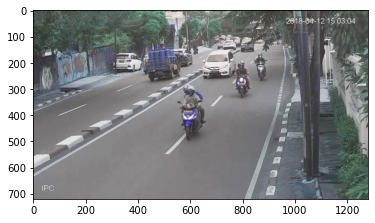

In [8]:
data_iter = iter(data_loader)
# Mini-batch images and labels
sample = next(data_iter)
image, boxes = sample['image'][0], sample['boxes'][0]
print(boxes)
plt.imshow(np.transpose(image, (1, 2, 0)))
plt.show()



In [12]:
xmin, ymin, xmax, ymax = boxes[0].numpy()

In [10]:
img = np.transpose(sample['image'][0], (1,2,0))
img = np.array(img)

type(img)

numpy.ndarray

In [13]:
temp = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)
type(temp)

cv2.UMat

In [15]:
cv2.imshow('',temp)
cv2.waitKey()

-1

In [16]:
sample

{'image': tensor([[[[ 40,  48,  71,  ...,  92,  93,  96],
           [ 46,  50,  48,  ...,  98,  95,  93],
           [ 39,  41,  36,  ...,  99,  99, 100],
           ...,
           [128, 128, 128,  ...,  91,  92,  94],
           [128, 128, 128,  ...,  77,  81,  86],
           [128, 128, 128,  ...,  43,  44,  47]],
 
          [[ 47,  55,  78,  ...,  99, 100, 103],
           [ 53,  57,  55,  ..., 105, 102, 100],
           [ 46,  48,  43,  ..., 106, 106, 107],
           ...,
           [128, 128, 128,  ..., 111, 112, 114],
           [128, 128, 128,  ...,  97, 101, 106],
           [128, 128, 128,  ...,  63,  64,  67]],
 
          [[ 44,  52,  75,  ...,  94,  95,  98],
           [ 50,  54,  52,  ..., 100,  97,  95],
           [ 43,  45,  40,  ..., 101, 101, 102],
           ...,
           [128, 128, 128,  ...,  99, 100, 102],
           [128, 128, 128,  ...,  85,  89,  94],
           [128, 128, 128,  ...,  51,  52,  55]]]], dtype=torch.uint8),
 'boxes': tensor([[[841, 155, 89